# **Entendendo Níveis de Isolamento no SQL Server**

#   

<mark>**Isolamento em bancos de dados.**</mark>

## \`A necessidade de isolamento surge devido à natureza multiusuário dos sistemas de banco de dados, nos quais várias transações (conjuntos de operações de leitura e gravação) podem estar ocorrendo simultaneamente. Sem a devida gestão de isolamento, problemas de concorrência podem ocorrer, como:

\`

# 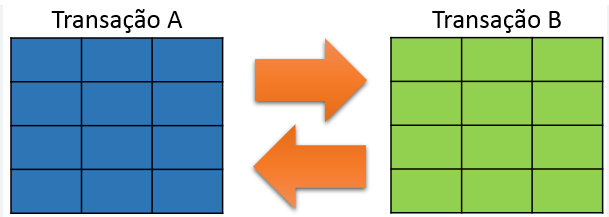

# **1.Abordagens para o controle de concorência e o isolamento de transações**

### <span style="color:rgb(55, 65, 81);font-family:Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;;font-size:16px;white-space:pre-wrap;background-color:rgb(247, 247, 248);"><b>Existe duas abordagens diferentes para o controle de concorrência e o isolamento de transações</b></span>

> > # 1\. Otimismo (Optimistic Concurrency Control):

- **Conflito Detectado Tardio:** <span style="background-color:rgb(247, 247, 248);color:rgb(55, 65, 81);font-family:Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;;font-size:16px;white-space:pre-wrap;">No otimismo, a ideia é que a maioria das transações não entra em conflito umas com as outras. Portanto, não há bloqueios pesados no início de uma transação.</span>
    
- **<mark>Detectar Conflitos no Fim: <span style="color:rgb(55, 65, 81);font-family:Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;;font-size:16px;white-space:pre-wrap;">Em vez de bloquear recursos no início de uma transação, o otimismo permite que as transações prossigam sem bloqueios. Os conflitos são detectados no final da transação.</span></mark>**
    
- **Reversão da Transação:** <span style="color:rgb(55, 65, 81);font-family:Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;;font-size:16px;white-space:pre-wrap;"><b style="background-color:yellow;">Se um conflito é detectado</b><span style="background-color:rgb(247, 247, 248);">, a transação é revertida e os dados são atualizados ou reenviados para refletir as alterações de outras transações que entraram em conflito.</span></span>
    
- **Melhor Desempenho em Cenários de Baixa Concorrência:** <span style="color:rgb(55, 65, 81);font-family:Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;;font-size:16px;white-space:pre-wrap;"><b>O otimismo tende a ser mais eficiente em cenários de baixa concorrência, onde os conflitos são raros. 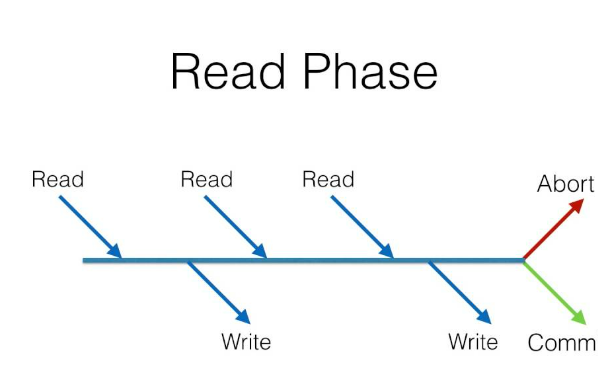</b></span> 
    
    #

- # 2\. Pessimismo (Pessimistic Concurrency Control):
    
    - <span style="background-color: rgb(247, 247, 248); border: 0px solid rgb(217, 217, 227); box-sizing: border-box; margin-top: 1.25em; margin-bottom: 1.25em;"><b>Bloqueio de Recursos no Início</b></span><span style="background-color: rgb(247, 247, 248); font-weight: 600; border: 0px solid rgb(217, 217, 227); box-sizing: border-box; margin-top: 1.25em; margin-bottom: 1.25em;">:</span> **<mark>O pessimismo envolve o bloqueio de recursos (linhas, tabelas, etc.) no início de uma transação para evitar conflitos com outras transações.</mark>**
    - **<mark><span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; margin-top: 1.25em; margin-bottom: 1.25em;">Manutenção de Bloqueios:</span></mark>** **<mark>Os recursos bloqueados são mantidos durante toda a transação</mark>**<span style="background-color: rgb(247, 247, 248);">,&nbsp;</span> **<mark>impedindo outras transações de acessá-los</mark>** <span style="background-color: rgb(247, 247, 248);">até que a transação seja confirmada ou revertida.</span>
    
    - **<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; margin-top: 1.25em; margin-bottom: 1.25em;">Garantia de Consistência:</span> O pessimismo garante a consistência de dados**, uma vez que não permite que outras transações acessem recursos bloqueados.
        
    - <span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; font-weight: 600; margin-top: 1.25em; margin-bottom: 1.25em;">Pode Causar Bloqueios:</span> O pessimismo pode levar a bloqueios intensos em cenários de alta concorrência, prejudicando o desempenho.
        
    -

# **1.1Diferenças entre as abordagens**

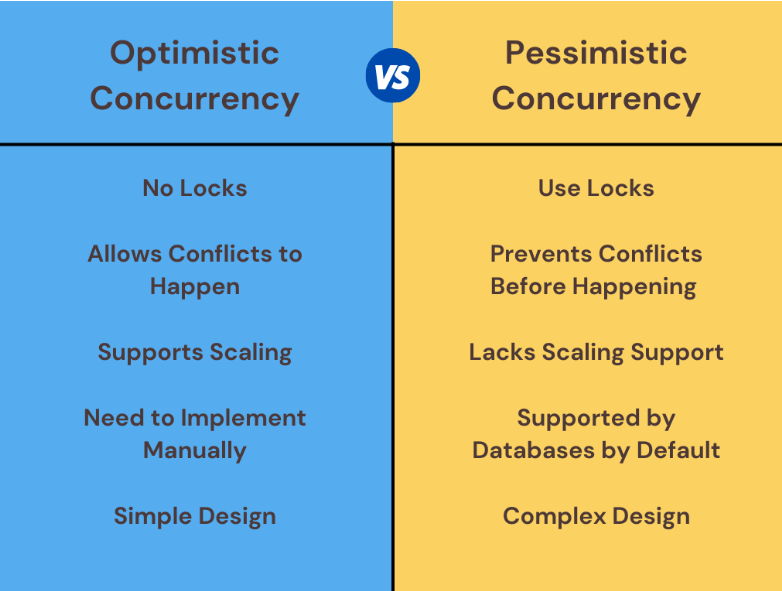

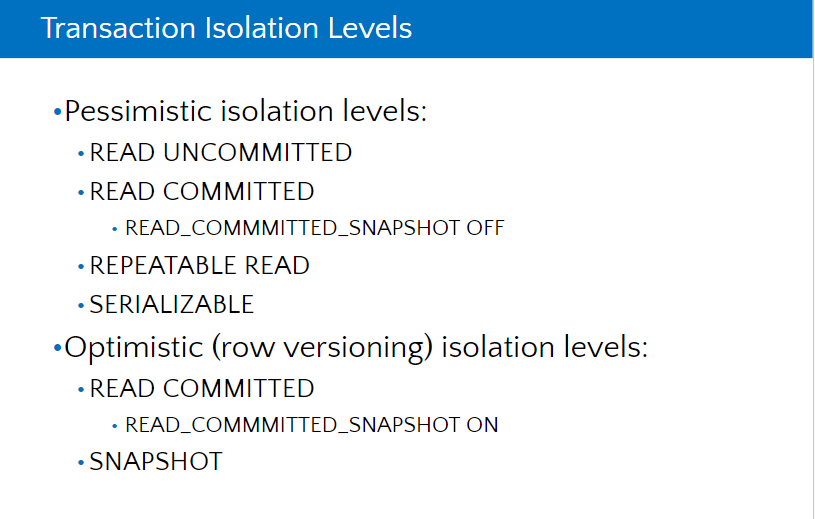

# **2\. Problemas de concorrencia no banco de dados**

## **<mark>2.1 Leituras sujas</mark>**

## <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">Uma&nbsp;</span> _leitura suja_ <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;ocorre quando uma transação lê dados que ainda não foram confirmados. Por exemplo, suponha que a transação 1 atualize uma linha. A transação 2 lê a linha atualizada antes de a transação 1 confirmar a atualização. Se a transação 1 reverter a alteração, a transação 2 terá dados de leitura que serão considerados como nunca tendo existido.</span>

| O que é                       | Problema                                                                                                           | Sintomas                                                                                                        | Solução                                                                                                                                  |
|------------------------------|-------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------|
| Leitura Suja (Dirty Reading) | O "Dirty Reading" ocorre quando uma transação lê dados que estão sendo alterados por outra transação, antes que a transação original tenha confirmado as alterações. | Isso pode levar a leituras imprecisas e pode causar problemas sérios, uma vez que a transação que estava realizando as alterações pode eventualmente ser revertida. | Utilizar o nível de isolamento adequado, como "READ COMMITTED" ou "REPEATABLE READ" ou "SERIALIZABLE," pode prevenir leituras sujas, garantindo que as transações leiam apenas dados confirmados. |


## **<mark>2.2 <span style="box-sizing: inherit; outline-color: inherit; color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px;">Leituras não repetíveis</span> <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px;">&nbsp;<br></span></mark>**   

## Uma _leitura não repetível_ <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;ocorre quando uma transação lê a mesma linha duas vezes, mas obtém dados diferentes a cada vez. Por exemplo, considere que a transação 1 atualize uma linha. A transação 2 atualiza ou exclui essa linha e confirma a atualização ou a exclusão. Se a transação 1 reler a linha, ela recuperará valores de linha diferentes ou descobrirá que a linha foi excluída.</span>**<mark><span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px;"><br></span></mark>**

| O que é                                    | Problema                                                                                                           | Sintomas                                                                                                        | Solução                                                                                                                                  |
|-------------------------------------------|-------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------|
| Leitura Não Repetível (Non-Repeatable Reading) | A Leitura Não Repetível ocorre quando uma transação lê os mesmos dados mais de uma vez e os dados mudam entre as leituras. | A transação lê dados que não são mais consistentes entre as leituras. | Utilizar o nível de isolamento adequado, como "READ COMMITTED" ou "REPEATABLE READ" ou "SERIALIZABLE," pode prevenir problemas de leitura não repetível, garantindo que os dados permaneçam consistentes durante a transação. |


# <mark>**2.3 <span style="box-sizing: inherit; outline-color: inherit; color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px;">Fantasmas</span><span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px;"><br></span>**</mark>

# Um _fantasma_   <span style="color: rgb(22, 22, 22); font-family: &quot;Segoe UI&quot;, SegoeUI, &quot;Helvetica Neue&quot;, Helvetica, Arial, sans-serif; font-size: 16px; background-color: rgb(255, 255, 255);">&nbsp;é uma linha que corresponde aos critérios de pesquisa, mas não é vista inicialmente. Por exemplo, suponha que a transação 1 leia um conjunto de linhas que cumpram alguns critérios de pesquisa. A transação 2 gerará uma nova linha (por meio de uma atualização ou inserção) que corresponde aos critérios de pesquisa da transação 1. Se a transação 1 executar novamente a instrução que lê as linhas, ela obterá um conjunto diferente de linhas.</span>

| O que é                           | Problema                                                                                                           | Sintomas                                                                                                        | Solução                                                                                                                                  |
|----------------------------------|-------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------------------|
| Phantom Read (Leitura Fantasma)  | Leitura Fantasma é quando uma transação lê um conjunto de dados que foi modificado por outra transação entre as leituras. | A transação lê dados que não existiam quando a transação começou ou não lê linhas que existiam anteriormente. | Utilizar o nível de isolamento adequado, como "READ COMMITTED" ou "REPEATABLE READ" ou "SERIALIZABLE," pode prevenir leituras fantasmas, garantindo que as transações vejam uma imagem consistente do banco de dados. |


## Para resolver esses problemas, os sistemas de banco de dados oferecem vários níveis de isolamento que controlam como as transações interagem entre si.

  

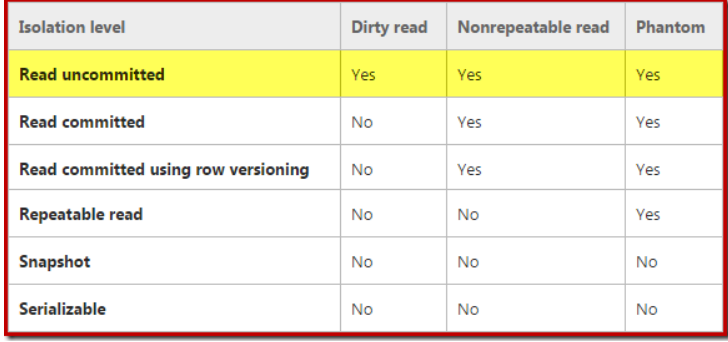

<span style="color: rgb(61, 61, 61); font-family: Montserrat; font-size: 26.6px; font-weight: 700; background-color: rgb(255, 255, 255);">The Serializable Isolation Level:<br><br></span><span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);"><b>Fornece o maior grau de isolamento</b>,<b> bloqueando linhas de dados que estão sendo lidas ou gravadas por outras transações</b>. Evita todos os problemas de concorrência mencionados acima, mas pode levar a bloqueios intensos.</span>

### \*\*<mark>É também o nível de isolamento padrão especificado pelo SQL-ANSI</mark>

# **Exemplo 1**

**Passo 1: Criar a Tabela SerializableDemo Vamos criar uma tabela simples chamada "SerializableDemo" com uma coluna "Valor" para armazenar valores.**

In [6]:
DROP TABLE if EXISTS SerializableDemo;

CREATE TABLE SerializableDemo (
    ID INT IDENTITY(1,1) PRIMARY KEY,
    Valor INT
);

Commands completed successfully.

Total execution time: 00:00:00.002

**Passo 2: Inserir Dados Iniciais Inseriremos alguns dados iniciais na tabela:**

In [7]:
INSERT INTO SerializableDemo (Valor) VALUES (100), (200);

(2 rows affected)

Total execution time: 00:00:00.001

**<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Passo 3: Demonstração do Nível SERIALIZABLE</span> <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Aqui estão duas transações concorrentes que demonstram o isolamento serializável:</span>**

**<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Nessa Aba</span>**

In [9]:
-- Iniciar a transação com nível SERIALIZABLE 
SET TRANSACTION ISOLATION LEVEL SERIALIZABLE;


BEGIN TRANSACTION T1;

-- Selecionar o valor máximo na tabela
SELECT MAX(Valor) FROM SerializableDemo;

-- Aguardar por alguns segundos (simulando algum processamento)
    WAITFOR DELAY '00:00:10';


COMMIT TRANSACTION T1;

(1 row affected)

Total execution time: 00:00:10.018

(No column name)
200


### **Passo 4 : Abra uma nova conexão e crie uma nova transação**

**Abrir (<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">1.Demonstração do Nível SERIALIZABLE Segunda Aba)</span>**

# **O que  está acontecendo por tras dos panos**

- <span style="color: var(--vscode-foreground);">Transação 1 começa com o nível SERIALIZABLE e seleciona o valor máximo da tabela (que é 200).</span>
    
- <span style="color: var(--vscode-foreground);">Transação 2 começa simultaneamente com o nível SERIALIZABLE e tenta inserir um novo valor na tabela (300).</span>
    
- <span style="color: var(--vscode-foreground);">O isolamento serializável bloqueia a transação 2 até que a transação 1 seja confirmada, para garantir que não haja conflitos.</span>
    
- <span style="color: var(--vscode-foreground);">Após a conclusão da transação 1, a transação 2 é liberada para continuar e insere o valor 300 na tabela.</span>
    
- ### **<mark>O isolamento serializável garante que as transações ocorram de maneira serializada, uma após a outra, para evitar conflitos de escrita concorrente.</mark>**

# **Exemplo 2**

**Passo 1:** <span style="background-color: rgb(247, 247, 248); color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: 600; white-space: pre-wrap;">Transação 1:</span>

In [11]:
-- Iniciar a transação com nível SERIALIZABLE
SET TRANSACTION ISOLATION LEVEL SERIALIZABLE;
BEGIN TRANSACTION;

-- Selecionar e exibir os valores da tabela
SELECT * FROM SerializableDemo;

-- Aguardar por alguns segundos (simulando algum processamento)
 WAITFOR DELAY '00:00:20';

COMMIT TRANSACTION ;

(2 rows affected)

Total execution time: 00:00:20.016

ID,Valor
1,100
2,200


**Passo 2:** <span style="color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: 600; white-space: pre-wrap;">Transação 2: </span> **Abrir (2<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">.Demonstração do Nível SERIALIZABLE Segunda Aba)</span>**

Resumo :

### <mark>**<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">OBS: A dica de tabela </span> `HOLDLOCK` <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">(também conhecida como </span> `XLOCK`<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">) é uma instrução usada em consultas SQL para explicitamente solicitar um bloqueio exclusivo em uma tabela durante a execução da transação. Essa dica é frequentemente usada para garantir o isolamento de transações e evitar problemas de concorrência em sistemas de gerenciamento de banco de dados.</span>**</mark>

<mark>\*\*  
<span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Quando você usa a dica </span> `HOLDLOCK` <span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">(ou </span> `XLOCK`<span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">) em uma consulta SQL, você está instruindo o sistema de banco de dados a manter um bloqueio exclusivo nas linhas de dados afetadas pela consulta até que a transação seja confirmada (comitada) ou revertida (rollback). Isso significa que outros usuários ou transações não poderão acessar essas linhas até que a transação atual seja concluída. Em outras palavras, a dica </span> `HOLDLOCK` <span style="font-weight: bold; color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">força um bloqueio exclusivo que é mantido por toda a duração da transação.</span>**\*\***</mark>

## <mark>**SELECT \* FROM SerializableDemo   <span style="font-size: 14px; color: var(--vscode-foreground);">WITH (HOLDLOCK)</span>**</mark>

# **Exemplo 3**

**Passo 1:** <span style="color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: 600; white-space: pre-wrap;">Transação 1:</span>

In [12]:
BEGIN TRAN t1

SELECT * FROM SerializableDemo WITH (HOLDLOCK)

 WAITFOR DELAY '00:00:20';

 COMMIT

(2 rows affected)

Total execution time: 00:00:20.012

ID,Valor
1,100
2,200


**Passo 2:** <span style="color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; font-weight: 600; white-space: pre-wrap;">Transação 2: </span>  **Abrir (3<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">.Demonstração do Nível SERIALIZABLE Segunda Aba)</span>**

# **O nível de isolamento _serializável_ fornece <span style="margin: 0px; padding: 0px; outline: none; text-rendering: optimizelegibility; max-width: 100%; color: rgb(61, 61, 61); font-family: Montserrat !important; box-sizing: border-box !important; background-color: yellow;"><font style="margin: 0px; padding: 0px; outline: none; text-rendering: optimizelegibility; max-width: 100%; vertical-align: inherit; font-family: &quot;Noto Sans&quot;, &quot;Open Sans&quot;, Calibri !important; box-sizing: border-box !important;">proteção completa</font></span> contra efeitos de simultaneidade que podem ameaçar a integridade dos dados e levar a resultados de consulta incorretos. Usar o isolamento serializável significa que, se uma transação puder produzir resultados corretos sem nenhuma atividade simultânea, ela continuará a funcionar corretamente ao competir com qualquer combinação de transações simultâneas.**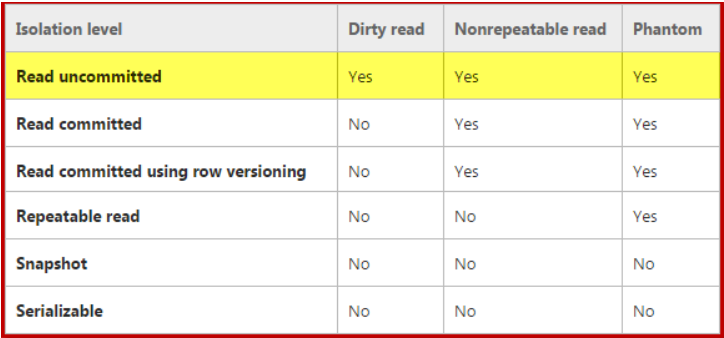

<span style="color: rgb(61, 61, 61); font-family: Montserrat; font-size: 26.6px; font-weight: 700; background-color: rgb(255, 255, 255);">Repeatable Read Isolation Level</span>

## <span style="background-color: rgb(247, 247, 248); color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Esse nível de isolamento <b>oferece um alto grau de consistência e evita dois principais problemas de concorrência: leituras não repetíveis e leituras sujas</b>.</span>

## **<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Non-Repeatable Read:(</span>****<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Leitura Não Repetível)</span>** **<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);"> Este problema ocorre quando uma transação lê um valor de uma linha em um banco de dados, outra transação modifica esse valor e, em seguida, a primeira transação lê a mesma linha novamente e obtém um valor diferente. O nível "Repeatable Read" resolve esse problema, bloqueando as linhas que estão sendo lidas por uma transação até que a transação seja concluída.</span>**

## **<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">Dirty Read</span> :(\*\*\*\*L<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">eitura Suja) </span>** **<span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);">A leitura suja ocorre quando uma transação lê um valor que está sendo modificado por outra transação, resultando em uma leitura imprecisa. O nível "Repeatable Read" também resolve esse problema, evitando que transações leiam dados não confirmados por outras transações.</span>**

# **Exemplo 1**

### **Passo 1:** Criar a Tabela RepeatableReadDemo Vamos criar uma tabela simples chamada "RepeatableReadDemo" com uma coluna "Valor" para armazenar valores.

In [13]:
DROP TABLE if EXISTS RepeatableReadDemo;

CREATE TABLE RepeatableReadDemo (
    ID INT IDENTITY(1,1) PRIMARY KEY,
    Valor INT
);


Commands completed successfully.

Total execution time: 00:00:00.002

**Passo 2:** Inserir Dados Iniciais Inseriremos alguns dados iniciais na tabela:

In [14]:
INSERT INTO RepeatableReadDemo (Valor) VALUES (100), (200);

(2 rows affected)

Total execution time: 00:00:00.004

### **Passo 3: Demonstração do Nível SERIALIZABLE Aqui estão duas transações concorrentes que demonstram o isolamento serializável:  
Nessa Aba**

In [16]:
-- Iniciar a transação com nível REPEATABLE READ
SET TRANSACTION ISOLATION LEVEL REPEATABLE READ;

BEGIN TRANSACTION;

-- Selecionar e exibir os valores da tabela
SELECT * FROM SerializableDemo;


 WAITFOR DELAY '00:00:20';

-- Confirmar a transação
COMMIT;

(2 rows affected)

Total execution time: 00:00:20.013

ID,Valor
1,100
2,200


**Passo 4: <span style="color: var(--tw-prose-bold); background-color: rgb(247, 247, 248); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Transação 2: </span>   Abrir (1<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; background-color: rgb(247, 247, 248);"><font color="rgba(0, 0, 0, 0)" face="Söhne, ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Ubuntu, Cantarell, Noto Sans, sans-serif, Helvetica Neue, Arial, Apple Color Emoji, Segoe UI Emoji, Segoe UI Symbol, Noto Color Emoji" style="color: var(--vscode-foreground); font-size: 14px;"><span style="font-size: 16px; white-space: pre-wrap;">.Demonstração do Nível </span></font><font face="Söhne, ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Ubuntu, Cantarell, Noto Sans, sans-serif, Helvetica Neue, Arial, Apple Color Emoji, Segoe UI Emoji, Segoe UI Symbol, Noto Color Emoji" style=""><span style="font-size: 16px; white-space: pre-wrap;">REPEATABLE READ </span></font><font color="rgba(0, 0, 0, 0)" face="Söhne, ui-sans-serif, system-ui, -apple-system, Segoe UI, Roboto, Ubuntu, Cantarell, Noto Sans, sans-serif, Helvetica Neue, Arial, Apple Color Emoji, Segoe UI Emoji, Segoe UI Symbol, Noto Color Emoji" style="color: var(--vscode-foreground); font-size: 14px;"><span style="font-size: 16px; white-space: pre-wrap;">Segunda Aba)</span></font></span>**

1. ### **O que está acontecendo por tras dos panos**
    

- <span style="background-color: rgb(247, 247, 248); color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">A Transação 1 inicia com o nível "Repeatable Read" e seleciona todos os valores da tabela. <b>O nível de isolamento impede que outras transações modifiquem as linhas que estão sendo lidas por esta transação até que ela seja confirmada.</b></span>
    
- <span style="background-color: rgb(247, 247, 248); color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Simultaneamente, a<b> Transação 2 também inicia com o nível "Repeatable Read" e tenta atualizar o valor na primeira linha da tabela. No entanto, ela é bloqueada até que a Transação 1 seja confirmada.</b></span>
    
- <span style="background-color: rgb(247, 247, 248); color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap;">Somente após a conclusão da Transação 1, a Transação 2 é liberada para executar a atualização.</span>
    

### **O nível "Repeatable Read" garante que, durante a leitura, nenhuma outra transação possa modificar as linhas lidas, garantindo leituras repetíveis e evitando leituras sujas. É um nível de isolamento útil quando você precisa de um alto grau de consistência de dados, mas deseja evitar bloqueios excessivos associados ao nível "Serializable".**

# **E aonde está o** <span style="color: rgb(255, 255, 255); font-family: &quot;Söhne Mono&quot;, Monaco, &quot;Andale Mono&quot;, &quot;Ubuntu Mono&quot;, monospace; white-space: pre; background-color: rgb(0, 0, 0);">Phantom Read ?</span>

### <span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);"><b>Passo 1: Crie uma tabela e insira alguns dados iniciais:</b></span>

In [19]:
Drop TABLE if EXISTS Empregados;

CREATE TABLE Empregados (
    ID INT PRIMARY KEY,
    Nome VARCHAR(100)
);

INSERT INTO Empregados (ID, Nome) VALUES 
(1, 'João'),
(3, 'Pedro'),
(100, 'Carlos');

(3 rows affected)

Total execution time: 00:00:00.005

<span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; color: var(--tw-prose-bold); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);"><b>Passo 2: Simule a "leitura fantasma" c</b>om duas transações concorrentes<b>: </b><span style="border: 0px solid rgb(217, 217, 227); box-sizing: border-box; --tw-border-spacing-x: 0; --tw-border-spacing-y: 0; --tw-translate-x: 0; --tw-translate-y: 0; --tw-rotate: 0; --tw-skew-x: 0; --tw-skew-y: 0; --tw-scale-x: 1; --tw-scale-y: 1; --tw-pan-x: ; --tw-pan-y: ; --tw-pinch-zoom: ; --tw-scroll-snap-strictness: proximity; --tw-gradient-from-position: ; --tw-gradient-via-position: ; --tw-gradient-to-position: ; --tw-ordinal: ; --tw-slashed-zero: ; --tw-numeric-figure: ; --tw-numeric-spacing: ; --tw-numeric-fraction: ; --tw-ring-inset: ; --tw-ring-offset-width: 0px; --tw-ring-offset-color: #fff; --tw-ring-color: rgba(69,89,164,0.5); --tw-ring-offset-shadow: 0 0 transparent; --tw-ring-shadow: 0 0 transparent; --tw-shadow: 0 0 transparent; --tw-shadow-colored: 0 0 transparent; --tw-blur: ; --tw-brightness: ; --tw-contrast: ; --tw-grayscale: ; --tw-hue-rotate: ; --tw-invert: ; --tw-saturate: ; --tw-sepia: ; --tw-drop-shadow: ; --tw-backdrop-blur: ; --tw-backdrop-brightness: ; --tw-backdrop-contrast: ; --tw-backdrop-grayscale: ; --tw-backdrop-hue-rotate: ; --tw-backdrop-invert: ; --tw-backdrop-opacity: ; --tw-backdrop-saturate: ; --tw-backdrop-sepia: ; font-weight: 600; color: var(--tw-prose-bold);">Transação 1:</span><b></b></span>

In [18]:
--WAITFOR TIME '00:00:30'

-- Iniciar a transação com nível REPEATABLE READ
SET TRANSACTION ISOLATION LEVEL REPEATABLE READ;

BEGIN TRANSACTION;

-- Selecionar e exibir todos os valores da tabela
SELECT * FROM Empregados
WHERE id BETWEEN 1 and 3


-- Aguardar por alguns segundos (simulando algum processamento)

WAITFOR DELAY '00:00:10';
-- Confirmar a transação


SELECT * FROM Empregados
WHERE id BETWEEN 1 and 3



COMMIT TRANSACTION;

(2 rows affected)

(3 rows affected)

Total execution time: 00:00:10.029

ID,Nome
1,João
3,Pedro


ID,Nome
1,João
2,Fantasma
3,Pedro


# <span style="color: rgb(55, 65, 81); font-family: Söhne, ui-sans-serif, system-ui, -apple-system, &quot;Segoe UI&quot;, Roboto, Ubuntu, Cantarell, &quot;Noto Sans&quot;, sans-serif, &quot;Helvetica Neue&quot;, Arial, &quot;Apple Color Emoji&quot;, &quot;Segoe UI Emoji&quot;, &quot;Segoe UI Symbol&quot;, &quot;Noto Color Emoji&quot;; font-size: 16px; white-space: pre-wrap; background-color: rgb(247, 247, 248);"><b>A "leitura fantasma" ocorrerá quando a primeira aba ler a linha que foi inserida na segunda aba durante a transação da primeira aba, antes de sua confirmação. Isso ilustra o comportamento típico do "leitura fantasma" no nível "REPEATABLE READ"</b></span>

Mesmo teste usando o <span style="color: rgb(0, 0, 255); font-family: Consolas, &quot;Courier New&quot;, monospace; font-size: 12px; white-space: pre;">SERIALIZABLE</span>

In [21]:
--WAITFOR TIME '00:00:30'

-- Iniciar a transação com nível REPEATABLE READ
SET TRANSACTION ISOLATION LEVEL SERIALIZABLE;

BEGIN TRANSACTION;

-- Selecionar e exibir todos os valores da tabela
SELECT * FROM Empregados
WHERE id BETWEEN 1 and 3


-- Aguardar por alguns segundos (simulando algum processamento)

WAITFOR DELAY '00:00:04';
-- Confirmar a transação


SELECT * FROM Empregados
WHERE id BETWEEN 1 and 3



COMMIT TRANSACTION;

(2 rows affected)

(2 rows affected)

Total execution time: 00:00:04.020

ID,Nome
1,João
3,Pedro


ID,Nome
1,João
3,Pedro
